In [73]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

In [74]:
df = pd.read_csv("NYC2017_STEWMAP_PublicPoints.csv")
network_df = pd.read_csv("NYC_STEWMAP_2017_Networks_ Connections.csv")
df.head()
network_df.head()

,From,To,Label,Type,Tags,Description,BoundText,Group Focus,MapYN,Mission,...,PopID,PopID _ALTER,Respondent PopID,Sector,Site Type,Stewardship Function,Version,YrFnd_Num,indegree,metrics::last
0,PARTNERSHIPS FOR PARKS,FRIENDS OF 20TH ST PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20296,4878,NaN,NaN,NaN,1,NaN,NaN,NaN
1,CHRISTOPHER PARK ALLIANCE,NYC PARKS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4655,2827,NaN,NaN,NaN,1,NaN,NaN,NaN
2,FRIENDS OF DAG HAMMARSKJOLD PLAZA,NYPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4664,100748,NaN,NaN,NaN,1,NaN,NaN,NaN
3,INTERNATIONAL RESCUE COMMITTEE- NEW ROOTS COMM...,NY CARES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1351,101272,NaN,NaN,NaN,1,NaN,NaN,NaN
4,URBAN RESOURCES INITIATIVE,FILLMORE STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20281,61343983,NaN,NaN,NaN,1,NaN,NaN,NaN


In [75]:
selected_cols = ['Conserve', 'Manage', 'Transform_','Monitor','Advocate','Educate','Particip']
organization_work_type_df = df[selected_cols]
organization_work_type_df.head()

,Conserve,Manage,Transform_,Monitor,Advocate,Educate,Particip
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [76]:
sum_all_columns = organization_work_type_df.sum()
sum_all_columns.head()

Conserve      259.0
Manage        582.0
Transform_    199.0
Monitor       234.0
Advocate      460.0
dtype: float64

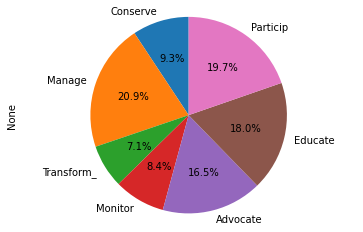

In [77]:
sum_all_columns.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [78]:
selected_cols = ['OrgCity', 'OrgTypeTxt']
org_type_df = df[selected_cols]
org_type_df.head()

,OrgCity,OrgTypeTxt
0,Middle Village,501(c)(4) (or has applied)
1,New York,501(c)(4) (or has applied)
2,New Brunswick,501(c)(3) (or has applied)
3,New York,501(c)(3) (or has applied)
4,Bronx,Group without 501(c)(3) or 501(c)(4) status


In [79]:
unique_values = org_type_df['OrgCity'].unique()
print(unique_values)


['Middle Village' 'New York' 'New Brunswick' 'Bronx' nan 'Arverne'
 'Staten Island' 'Brooklyn' 'Flushing' 'Bloomfield' 'Forest Hills'
 'Elmhurst' 'Kew Gardens' 'Rosedale NY' 'Norwalk' 'Loganville' 'brooklyn'
 'Broad Channel' 'City Island' 'Woodhaven' 'bronx' 'Hyde Park' 'BROOKLYN'
 'Little Neck' 'new york' 'Long Island City' 'Rockaway Park'
 'Jackson Heights' 'Yonkers' 'Manhattan' 'Patchogue' 'Bayside'
 'ROCKAWAY PARK' 'Corona' 'Richmond Hill' 'Westport' 'Queens' 'Rosedale'
 'Hamilton Beach' 'College Park' 'Vienna' 'Far Rockaway' 'Newburgh'
 'Chappaqua' 'Stockholm' 'Upper Montclair' 'Briarwood' 'staten island'
 'Newfoundland' 'Ridgewood' 'Montclair' 'South Orange' 'NEW YORK'
 'E. Elmhurst' 'Jackson' 'Pennington' 'Boonton' 'Bernardsville' 'Ringoes'
 'Sunnyside' 'Patterson' 'Douglaston' 'Cornwall' 'Nyack' 'Teaneck'
 'Jersey City' 'Westfield' 'Hauppauge' 'Bedford' 'flushing'
 'hamilton beach' 'New york' 'Morristown' 'Gladstone NJ' 'Edison'
 'Brewster' 'Amityville' 'Bethany' 'Calverton' 'G

In [80]:
grouped_data = org_type_df.groupby(['OrgCity', 'OrgTypeTxt'])
count_data = grouped_data.size()
count_data.head()


OrgCity     OrgTypeTxt                
Accord      501(c)(3) (or has applied)    1
Amityville  501(c)(3) (or has applied)    1
Andover     501(c)(3) (or has applied)    1
Annandale   501(c)(3) (or has applied)    1
Arverne     501(c)(3) (or has applied)    3
dtype: int64

In [81]:
sorted_data = count_data.sort_values(ascending=False).reset_index()

sorted_data_20 = sorted_data.head(20)
sorted_data_20

,OrgCity,OrgTypeTxt,0
0,New York,501(c)(3) (or has applied),134
1,Brooklyn,501(c)(3) (or has applied),107
2,Brooklyn,Group without 501(c)(3) or 501(c)(4) status,54
3,New York,Group without 501(c)(3) or 501(c)(4) status,49
4,Bronx,501(c)(3) (or has applied),32
5,Staten Island,501(c)(3) (or has applied),25
6,Bronx,Group without 501(c)(3) or 501(c)(4) status,19
7,Brooklyn,Other,18
8,New York,Other,13
9,Bronx,School-affiliated group,13


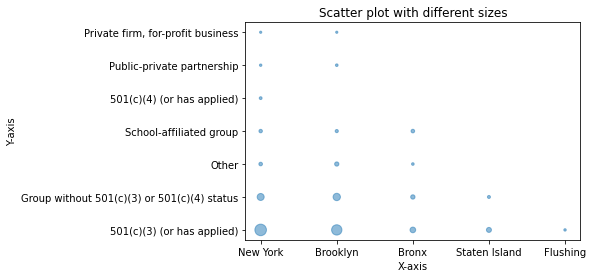

In [82]:

plt.scatter(sorted_data_20['OrgCity'], sorted_data_20['OrgTypeTxt'], s=sorted_data_20[0], alpha=0.5)

# set the labels and title of the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot with different sizes')

# show the plot
plt.show()

1 = 501(c)(3) (or has applied)
2 = 501(c)(4) (or has applied)
3 = Community group/organization without 501(c)(3) or 501(c)(4) status (such as a block club)
4 = School district
5 = Federal government agency
6 = State government agency
7 = Local government agency
8 = Public institution (not an agency)
9 = Quasi governmental organization (such as a port authority)
10 = Private firm, for-profit business501(c)(3) (or has applied)
11 = Other, see "OrgType_Other"

In [83]:
selected_cols = ['BoundText']
boundaries_df = df[selected_cols]
boundaries_df.head(20)

,BoundText
0,"On the north,The Long Island Expressway\nOn th..."
1,shore rad between 69st an shore road at 72 st
2,The LRWP focuses stewardship activities in the...
3,Metropolitan New York/NJ
4,Meg's Garden and Edible Forest at north end of...
5,The community garden inside North Pacific Play...
6,We manage the gardens on the East River Esplan...
7,NaN
8,"We work citywide, but in the last year, mostly..."
9,Montefiore Park Neighborhood. 133 Street to 1...


Feb.  
Notes: Used to map polygons, in addition to polygons created by respondents in Maptionnaire. Not all groups mapped their turfs, so the STEW-MAP team mapped turfs from these descriptions.

How did they make the turfs based on these descriptions?
Are these decriptions useful to my project? How can I use them? Difficult level?  

Mar.  
Not to use turfs, city, try using zip code to map out

In [84]:
selected_cols = ['OrgName','OrgCity','PS_Wtershd','PS_Stream','PS_Shrline']
projsite_df = df[selected_cols]
projsite_df.head(20)

,OrgName,OrgCity,PS_Wtershd,PS_Stream,PS_Shrline
0,Juniper Park Civic Association,Middle Village,0.0,0.0,0.0
1,Narrows Botanical Garden,New York,0.0,0.0,0.0
2,Lower Raritan Watershed Partnership,New Brunswick,1.0,1.0,0.0
3,Waterfront Alliance,New York,1.0,1.0,0.0
4,Baldwin Learning Center (BLC) Coalition,Bronx,0.0,0.0,0.0
5,North Pacific Garden,NaN,0.0,0.0,0.0
6,Green Park Gardeners NY,New York,0.0,1.0,0.0
7,Friends of Arverne,Arverne,0.0,0.0,0.0
8,Green Map NYC,New York,1.0,0.0,0.0
9,Montefiore Park Neighborhood Association,New York,0.0,0.0,0.0


To do: Create project categories and group projects name - water, land, system, other.  

Mar.  
Done

In [85]:
selected_cols = ['OrgName','OrgCity','PS_Wtershd','PS_Stream','PS_Shrline','PS_Wetland',
                 'PSSaltMrsh','PS_Forest','PS_Park','PS_CommGrd','PS_UrbFarm','PS_VacLot',
                 'PS_Brwnfld','PS_Ballfld','PS_PlayFld','PS_DogPark','PS_PubGrdn','PS_Grnways',
                 'PS_PROW','PS_StrTree','PS_Planter','PS_ResBldg','PS_Schlyrd','PS_PubBldg','PS_Crtyard',
                 'PS_GrnRoof','PS_GrnBldg','PS_WsteSys','PS_FdSys','PS_StrmWtr','PS_Atmsphr',
                 'PS_Other','PS_None','PS_EnrgySy']
projsite_df = df[selected_cols]

def water_proj_df(row):
    if row['PS_Stream'] or row['PS_Shrline'] or row['PS_Wetland'] or row['PSSaltMrsh']:
        return 1
    else:
        return 0

def land_proj_df(row):
    if row['PS_Forest'] or row['PS_Park'] or row['PS_CommGrd'] or row['PS_UrbFarm'] or row['PS_VacLot']\
        or row['PS_Brwnfld'] or row['PS_Ballfld'] or row['PS_PlayFld'] or row['PS_DogPark']\
        or row['PS_PubGrdn'] or row['PS_Grnways'] or row['PS_PROW'] or row['PS_StrTree'] or row['PS_Planter'] or row['PS_ResBldg']\
        or row['PS_Schlyrd'] or row['PS_PubBldg'] or row['PS_Crtyard'] or row['PS_GrnRoof'] or row['PS_GrnBldg']:
        return 1
    else:
        return 0
    
def system_proj_df(row):
    if row['PS_WsteSys'] or row['PS_FdSys'] or row['PS_StrmWtr'] or row['PS_Atmsphr'] or row['PS_EnrgySy']:
        return 1
    else:
        return 0
    
def other_proj_df(row):
    if row['PS_Other']:
        return 1
    else:
        return 0

def none_proj_df(row):
    if row['PS_None']:
        return 1
    else:
        return 0
# Apply function to each row to compute age in dog years
projsite_df['water_proj'] = projsite_df.apply(water_proj_df, axis=1)
projsite_df['land_proj'] = projsite_df.apply(land_proj_df, axis=1)
projsite_df['system_proj'] = projsite_df.apply(system_proj_df, axis=1)
projsite_df['other_proj'] = projsite_df.apply(other_proj_df, axis=1)
projsite_df['none_proj'] = projsite_df.apply(none_proj_df, axis=1)

selected_cols = ['water_proj','land_proj','system_proj','other_proj','none_proj']
categorized_df = projsite_df[selected_cols]
categorized_df.head(20)

sums = categorized_df.sum().reset_index()

print(sums)


         index    0
0   water_proj  146
1    land_proj  650
2  system_proj  291
3   other_proj  128
4    none_proj   52


/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/2699552987.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projsite_df['water_proj'] = projsite_df.apply(water_proj_df, axis=1)
/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/2699552987.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projsite_df['land_proj'] = projsite_df.apply(land_proj_df, axis=1)
/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/2699552987.py:44: SettingWithCopyWarning: 
A value is tryin

To do: For each category, visualize how many projects have been done by organizations 

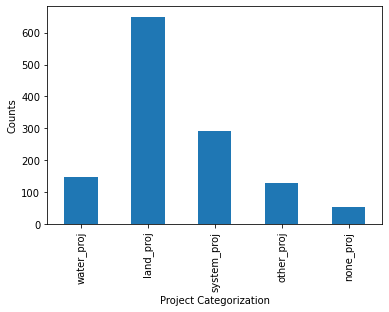

In [86]:
ax = sums.plot(kind='bar', x="index", y=0, legend=False)

# set chart title and axis labels
ax.set_xlabel('Project Categorization')
ax.set_ylabel('Counts')

# show the chart
plt.show()

Opportunity: 1. Three maps on the density of water, land, system in each city  

Mar.  
Need zipcode to map out boroughs  
Valuable questions can ask by mapping out project sites in boroughs? Connect with environment dataset?

In [87]:
selected_cols = ['OrgName','OrgCity','water_proj','land_proj','system_proj','other_proj','none_proj']
categorized_df = projsite_df[selected_cols]
categorized_df.head(20)

grouped_data = categorized_df.groupby(['OrgCity'])
count_data = grouped_data.sum()
sorted_data = count_data.sort_values('land_proj',ascending=False).reset_index()

sorted_data.head(8)



,OrgCity,water_proj,land_proj,system_proj,other_proj,none_proj
0,New York,29,174,85,32,16
1,Brooklyn,18,159,71,27,9
2,Bronx,16,67,27,11,3
3,Staten Island,10,36,11,11,4
4,BROOKLYN,1,8,1,1,1
5,Flushing,1,7,4,3,1
6,Forest Hills,0,5,0,0,1
7,Long Island City,0,5,3,0,1


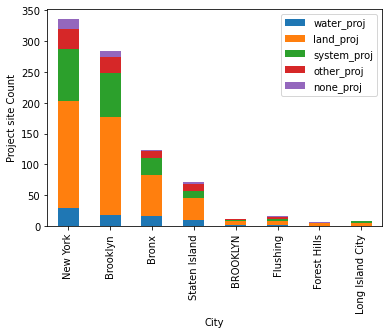

In [88]:
ax = sorted_data.head(8).plot(kind='bar', x='OrgCity', stacked=True)

# set chart title and axis labels
ax.set_xlabel('City')
ax.set_ylabel('Project site Count')

# show the chart
plt.show()

Notes from meeting- 
Use other Regional division， eg.State wide, columns that describe how big the region is.
Direction - Use Analyzed data, and web implementation 

A huge part to learn GIS, not worth it
turfs? spatial analysis lots of details and kind of messed up 

After the analysis, can connect to Michel XXX who created the map?? She'd like to give more thoughts and idea

In [89]:
selected_cols = [
    # 'OrgName','OrgCity',
    "OF_Animal",
    "OF_Arts",
    "OF_CommImp",
    "OF_Crime",
    "OF_EconDev",
    "OF_Educ",
    "Of_ER",
    "OF_Employ",
    "OF_EngyEff",
    "OF_Environ",
    "OF_Faith",
    "OF_Food",
    "OF_Housing",
    "OF_HumServ",
    "OF_LeglSrv",
    "OF_PwrGen",
    "OF_GrantPR",
    "OF_PubHlth",
    "OF_SprtRec",
    "OF_RandD",
    "OF_Senior",
    "OF_Pollute",
    "OF_Transpo",
    "OF_Youth",
    "OrgFnOther",
]
org_func_df = df[selected_cols]
# org_func_df.head(20)

count_data = org_func_df.sum()
sorted_data = count_data.sort_values(0,ascending=False).reset_index()
sorted_data.head(20)

/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/634949138.py:33: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  sorted_data = count_data.sort_values(0,ascending=False).reset_index()


,index,0
0,OF_Environ,456.0
1,OF_CommImp,418.0
2,OF_Educ,384.0
3,OF_Arts,256.0
4,OF_Youth,247.0
5,OF_Food,198.0
6,OF_SprtRec,152.0
7,OF_EconDev,105.0
8,OF_Senior,103.0
9,OrgFnOther,96.0


In [90]:
selected_cols = ['PrimFocus']
focus_df = df[selected_cols]

grouped_data = focus_df.groupby(['PrimFocus'])
count_data = grouped_data.size()
sorted_data = count_data.sort_values(0,ascending=False).reset_index()

sorted_data.head(20)

/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/2242514452.py:6: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  sorted_data = count_data.sort_values(0,ascending=False).reset_index()


,PrimFocus,0
0,Environment,187
1,Community improvement and capacity building,133
2,Education,114
3,Food,53
4,Other,49
5,"Arts, culture, creative practices",41
6,Recreation and sports (including birding and f...,21
7,Youth,21
8,Economic development,19
9,Animal related,10


Need complement data? - Describe relationship between Primary focus and Org function/projects/etc ??  
Combining regional data??

PctStewTxt  
Considering all of the programs, activities, and services your group works on, what percentage of your group’s effort has been for environmental stewardship during the past year?

/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


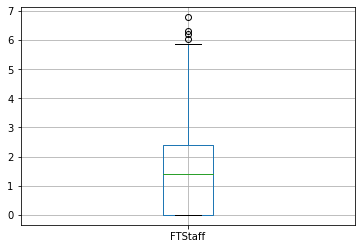

/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


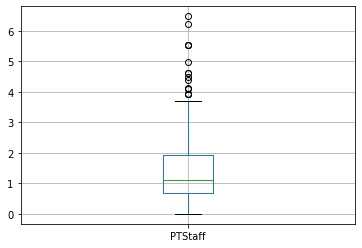

/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


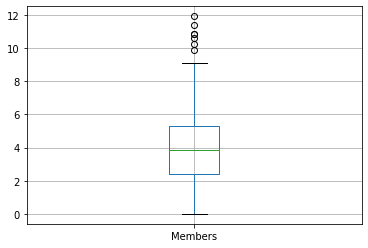

/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


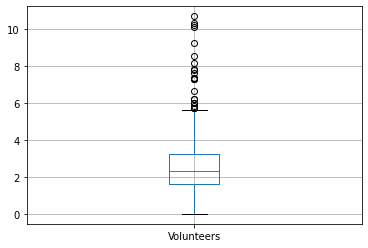

/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


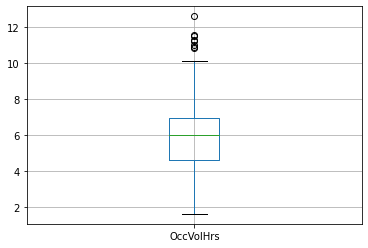

In [91]:

selected_cols = ['FTStaff','PTStaff','Members','Volunteers','OccVolHrs']
staff_df = df[selected_cols]

def staff_plot(col_name):
    # data cleaning
    filtered_df = staff_df[staff_df[col_name] > 0] 

    # transformation
    log_df = filtered_df.applymap(np.log)

    ax = log_df.boxplot(column=[col_name])
    plt.show()

staff_plot('FTStaff')
staff_plot('PTStaff')
staff_plot('Members')
staff_plot('Volunteers')
staff_plot('OccVolHrs')

In [92]:
selected_cols = ['RegColl','Knowledge','Funding']
collaboration_df = df[selected_cols]
collaboration_df.head(20)

,RegColl,Knowledge,Funding
0,Newtown Historical Society\nJuniper Valley Par...,Transportation Alturnatives\nJuniper Valley Pa...,Transportation Alternatives\nNew York Landmark...
1,of garden groups,NaN,parks dept
2,Watershed and other local environmental groups...,Institutional Partners\n\nMiddlesex County Cho...,Johnson and Johnson\nThe Watershed Institute\n...
3,Virtually every environmental and environmenta...,Too numerous to name,Confidential
4,DeWitt Clinton High School\nMarpillero Pollak ...,Bronx Green Up\nGreen Thumb\nMarpillero Pollak...,Citizen's Committee of New York City\nGrow to ...
5,NaN,We work with the Parks department and the Broo...,Boerum Hill Neighborhood Association provided ...
6,Friends of the Esplanade (60th - 120th Street)...,Upper Greenside\nCommunity Board 8\nCity Counc...,Friends of the Esplanade\nPartnership 4 Parks\...
7,NaN,NaN,NaN
8,Partnerships for Parks\nSara Roosevelt Park Co...,We get help from so many groups!!,TED\nCivic Hall\nCitizens Committee\nIOBY\nPar...
9,NaN,NaN,NaN


Opportunity: Inspect Network dataset, "From - To" to analysis the average number of collaborated organizations for each organization  
or, which organization has the most collaborated organizations, etc    
RegColl-Please list groups with which you regularly collaborate on environmental projects or programs.  
Knowledge - Please list groups that you go to for knowledge, data, or expertise related to environmental issues.  
Funding - Please list groups from which you have received resources (e.g. funding or materials).

In [93]:
selected_cols = ['Goals']
goal_df = df[selected_cols]
goal_df.head(20)

,Goals
0,Cleaning up railroad abutments \nLess air and ...
1,more active members and funding
2,\nEstablish TMDLs throughout the whole of WMA9...
3,Improve the access for the public and the qual...
4,We want to continue to develop our school grou...
5,A more beautiful and well maintained park in a...
6,To provide habitat for pollinators\nTo contrib...
7,NaN
8,"Better city for all, across the board"
9,NaN


In [94]:
selected_cols = ['Track']
track_df = df[selected_cols]


track_df.head(20)

,Track
0,I don't know
1,I don't know
2,Yes
3,No
4,Yes
5,No
6,Yes
7,NaN
8,Yes
9,No


Does your group track metrics about your activities? (e.g., number of trees planted, number of schools visited, number of acres conserved, number of volunteers/event, program satisfaction)?  
Question: Numbers between 1~100 what's the meaning of it?  
1 = 0 - 19%, 2 = 20 - 39%, 3 = 40 - 59%, 4 = 60 - 79%, 5 = 80 - 100%

In [95]:

selected_cols = ['ComPartic','TrustBnNei','InflncPP','PltsHabQy','AirWatQlty','LndPrtctn','UrbnSustn','PlaNYC2007',
                'MTNYC','DEP2010','Vis2020','PlaNYC2013','VZero2014','OneNYC2015','Waste2015','OthPlans' ]
activity_metric_df = df[selected_cols]
activity_metric_df.head(20)

,ComPartic,TrustBnNei,InflncPP,PltsHabQy,AirWatQlty,LndPrtctn,UrbnSustn,PlaNYC2007,MTNYC,DEP2010,Vis2020,PlaNYC2013,VZero2014,OneNYC2015,Waste2015,OthPlans
0,0.0,7.0,6.0,6.0,5.0,6.0,5.0,2.0,6.0,1.0,1.0,1.0,5.0,1.0,3.0,0.0
1,7.0,7.0,0.0,7.0,7.0,6.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,7.0,6.0,5.0,0.0,0.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,6.0,6.0,6.0,6.0,6.0,1.0,6.0,7.0,2.0,2.0,7.0,7.0,7.0,7.0,1.0,1.0
4,5.0,5.0,5.0,6.0,5.0,5.0,6.0,5.0,5.0,5.0,3.0,6.0,5.0,5.0,6.0,0.0
5,0.0,0.0,0.0,7.0,5.0,5.0,0.0,2.0,6.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
6,7.0,0.0,7.0,7.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7.0,5.0,6.0,5.0,6.0,6.0,6.0,5.0,3.0,6.0,5.0,5.0,7.0,5.0,5.0,7.0
9,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,7.0,1.0,7.0,7.0,7.0,2.0,7.0


Question: "driver" - What drives the organizations to make the decision/dedicate to what kind of organization functions & primfocus?  
                     Between 0-100? What does it mean for example which driver takes the highest proportion to impact the decision?

In [96]:

selected_cols = ['Dr_ExtrWth','DR_CC','Dr_FinanCr','Dr_SocialM','Dr_EO','Dr_NeighDe','Dr_Other','Dr_Text',
                'Dr_NA']
driver_df = df[selected_cols]
driver_df.head(20)

,Dr_ExtrWth,DR_CC,Dr_FinanCr,Dr_SocialM,Dr_EO,Dr_NeighDe,Dr_Other,Dr_Text,Dr_NA
0,6.0,3.0,3.0,5.0,7.0,7.0,0.0,NaN,NaN
1,7.0,7.0,7.0,0.0,0.0,0.0,4.0,NaN,NaN
2,2.0,6.0,1.0,7.0,6.0,7.0,0.0,NaN,NaN
3,7.0,7.0,2.0,2.0,7.0,3.0,1.0,NaN,NaN
4,3.0,5.0,5.0,6.0,4.0,5.0,0.0,NaN,NaN
5,4.0,4.0,1.0,1.0,1.0,5.0,1.0,NaN,NaN
6,7.0,0.0,1.0,1.0,6.0,7.0,0.0,NaN,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
8,7.0,7.0,6.0,7.0,3.0,7.0,0.0,NaN,NaN
9,6.0,0.0,1.0,6.0,6.0,6.0,0.0,NaN,NaN


What types of services does your group provide? Please select all that apply.

In [97]:

selected_cols = ['Serv_Data','Serv_Legal','Serv_Build','Serv_Equip','Serv_Tech','Serv_Labor','Serv_Grnts','Serv_Comp',
                'Serv_PR','Serv_Data','Serv_Ot','Serv_Other']
activity_metric_df = df[selected_cols]
activity_metric_df.head(20)

,Serv_Data,Serv_Legal,Serv_Build,Serv_Equip,Serv_Tech,Serv_Labor,Serv_Grnts,Serv_Comp,Serv_PR,Serv_Data,Serv_Ot,Serv_Other
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,"Food surplus, seeds"
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN


In [98]:

selected_cols = ['Shr_No','Shr_Natl','Shr_Local','Shr_Dir','Shr_MailBs','Shr_Door','Shr_WrdMth','Shr_Flyer',
                'Shr_Web','Shr_Social','Shr_List','Shr_Blog','Shr_NtlCnf','Shr_City','Shr_Radio','Shr_TV','Shr_Ot','Shr_OtDesc' ]
share_medium_df = df[selected_cols]
sum_share_medium = share_medium_df.sum()
sorted_share_medium = sum_share_medium.sort_values(ascending=False).reset_index()


sorted_share_medium.head(20)

/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/3856054506.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_share_medium = share_medium_df.sum()


,index,0
0,Shr_Social,461.0
1,Shr_WrdMth,445.0
2,Shr_Web,429.0
3,Shr_MailBs,417.0
4,Shr_Flyer,401.0
5,Shr_Local,326.0
6,Shr_City,321.0
7,Shr_Dir,177.0
8,Shr_NtlCnf,148.0
9,Shr_Door,124.0


Key research 1.  
How does your group share information with the public? Please select all that apply.
How many medium types in individual organization?  
How many organizations are using one type of medium?   
What's the most popular medium among organizations?    
How does social media/web/mail/blog affect the network & volunteer & fund amount of organizations? 
在最受欢迎的5种medium types里，比较使用它们和不使用它们的组织在network，volunteer上有没有significant difference（boxplot？看高低？）

Mar.  
Done

Combine two dataframes(point and network)

In [99]:
selected_cols = ['Respondent PopID', 'PopID _ALTER']
selected_network_df = network_df[selected_cols]

grouped_data = selected_network_df.groupby(['Respondent PopID'])
count_data = grouped_data.size()
sorted_data = count_data.sort_values(ascending=False).reset_index()
sorted_data = sorted_data.rename(columns={'Respondent PopID': 'PopID', 0: 'NetworkCount'})
sorted_data.head(20)

sorted_data['PopID'] = sorted_data['PopID'].astype('str')
df['PopID'] = df['PopID'].astype('str')

combined_df = pd.merge(df, sorted_data, on='PopID')
combined_df.head(10)

,OBJECTID,ResID,POINT_X,POINT_Y,pointtype,PopID,Research,PublicMap,InRespRate,NYC_region,...,Fnd_Donate,Fnd_Memb,Fnd_Fees,Fund_Other,Fnd_OtDesc,Fund_NoBud,Fund_Prefe,Inter_YN,Version,NetworkCount
0,1,210,594583.7924,4.508079e+06,Group - office location,101040,Y,Y,Y,NYC,...,0.000000,1.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,4
1,3,223,546456.6625,4.481861e+06,Group - office location,104920,Y,Y,Y,NYC,...,0.166667,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,11
2,4,1178,584205.9147,4.506758e+06,Group - office location,2037,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,1.0,1.0,1,147
3,5,1941,593739.3949,4.526178e+06,Group - office location,20066,NaN,Y,NaN,NaN,...,0.273973,0.0,0.0,0.684932,Grants and awards,0.0,0.0,1.0,1,14
4,7,388,588002.8763,4.512597e+06,Group - office location,104177,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,1.0,0.0,1.0,1,9
5,9,1075,586164.3325,4.508301e+06,Group - office location,1237,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,1.0,1.0,1,11
6,11,1915,586001.8459,4.508619e+06,Group - office location,100680,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,1.0,0.0,1,1
7,13,44,593102.4434,4.519397e+06,Group - office location,101044,Y,Y,Y,NYC,...,0.200000,0.0,0.0,0.000000,NaN,0.0,0.0,1.0,1,8
8,14,124,578126.8260,4.499391e+06,Group - office location,100827,Y,Y,Y,NYC,...,0.100000,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,10
9,17,131,590020.5944,4.503056e+06,Group - office location,5386,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,6


Select social share as a starting point to compare

In [100]:

selected_cols = ['Shr_Social','Volunteers','NetworkCount','Fnd_BdgAmt']
significant_difference_df = combined_df[selected_cols]


significant_difference_df.head(50)

# next, need to filter social = 1, social = 0, then compare - March.09 1:30AM

filtered_social_df = significant_difference_df[significant_difference_df['Shr_Social'] == 1.0] 
filtered_social_df.head(20)

filtered_nonsocial_df = significant_difference_df[significant_difference_df['Shr_Social'] == 0.0] 
filtered_nonsocial_df.head(10)

,Shr_Social,Volunteers,NetworkCount,Fnd_BdgAmt
5,0.0,47.0,11,1000000
6,0.0,5.0,1,NaN
9,0.0,6.0,6,NaN
12,0.0,8.0,1,2500
14,0.0,5.0,6,100000
16,0.0,4.0,6,NaN
17,0.0,5.0,3,NaN
22,0.0,10.0,6,NaN
27,0.0,20.0,4,5000
31,0.0,3.0,2,4000


Text(0, 0.5, 'Values')

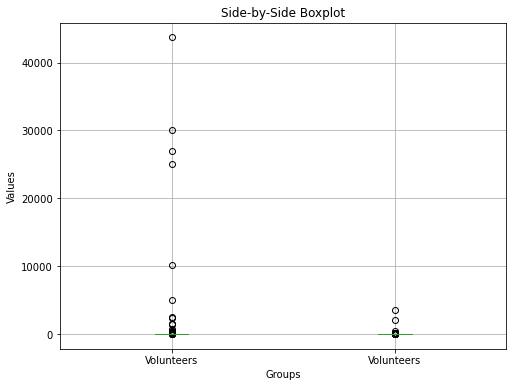

In [101]:
fig, ax = plt.subplots(figsize=(8,6))
filtered_social_df.boxplot(column=['Volunteers'], positions=[1], ax=ax)
filtered_nonsocial_df.boxplot(column=['Volunteers'], positions=[2], ax=ax)

# Set the title and labels
plt.title('Side-by-Side Boxplot')
plt.xlabel('Groups')
plt.ylabel('Values')

Log transformation to make the visualization clearer, cleaner and prettier.

Text(0, 0.5, 'Volunteers(Log transferred)')

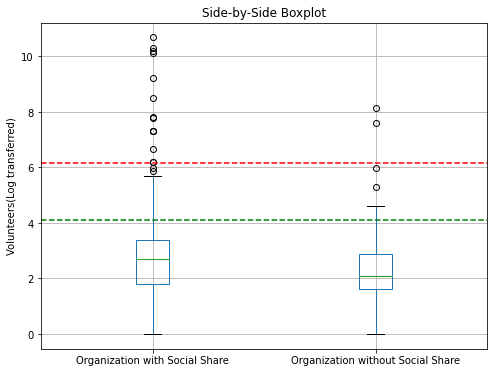

In [102]:
fig, ax = plt.subplots(figsize=(8,6))
filtered_social_df[["Volunteers"]][filtered_social_df['Volunteers'] > 0]\
    .applymap(np.log)\
    .boxplot(column=['Volunteers'], positions=[1], ax=ax)
filtered_nonsocial_df[["Volunteers"]][filtered_nonsocial_df['Volunteers'] > 0]\
    .applymap(np.log)\
    .boxplot(column=['Volunteers'], positions=[2], ax=ax)
ax.set_xticklabels(['Organization with Social Share', 'Organization without Social Share'])


# base "e" = mathematical constant approximately equal to 2.71828

# Add mean lines

left_mean= filtered_social_df[filtered_social_df['Volunteers'] > 0]['Volunteers'].mean()
right_mean = filtered_nonsocial_df[filtered_nonsocial_df['Volunteers'] > 0]['Volunteers'].mean()

ax.axhline(y=np.log(left_mean), color='r', linestyle='--', label='Mean A')
ax.axhline(y=np.log(right_mean), color='g', linestyle='--', label='Mean B')

# Set the title and labels
plt.title('Side-by-Side Boxplot')
plt.ylabel('Volunteers(Log transferred)')

# Analysis - When compare the number of volunteers of these organizations, 

In [103]:
left_median = filtered_social_df[filtered_social_df['Volunteers'] > 0]['Volunteers'].median()
right_median = filtered_nonsocial_df[filtered_nonsocial_df['Volunteers'] > 0]['Volunteers'].median()
left_median, right_median



(15.0, 8.0)

In [104]:
# Generate two sets of random data
group1 = filtered_social_df[filtered_social_df['Volunteers'] > 0]['Volunteers']
group2 = filtered_nonsocial_df[filtered_nonsocial_df['Volunteers'] > 0]['Volunteers']

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Print the results
print("t-statistic = ", t_statistic)
print("p-value = ", p_value)

t-statistic =  1.3583254072404827
p-value =  0.17500794256927052


Text(0, 0.5, 'Network Number(Log transferred )')

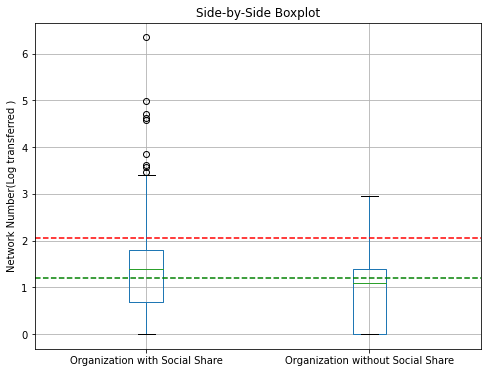

In [105]:
fig, ax = plt.subplots(figsize=(8,6))
filtered_social_df[["NetworkCount"]][filtered_social_df['NetworkCount'] > 0]\
    .applymap(np.log)\
    .boxplot(column=['NetworkCount'], positions=[1], ax=ax)
filtered_nonsocial_df[["NetworkCount"]][filtered_nonsocial_df['NetworkCount'] > 0]\
    .applymap(np.log)\
    .boxplot(column=['NetworkCount'], positions=[2], ax=ax)
ax.set_xticklabels(['Organization with Social Share', 'Organization without Social Share'])


# base "e" = mathematical constant approximately equal to 2.71828

# Add mean lines

left_mean= filtered_social_df[filtered_social_df['NetworkCount'] > 0]['NetworkCount'].mean()
right_mean = filtered_nonsocial_df[filtered_nonsocial_df['NetworkCount'] > 0]['NetworkCount'].mean()

ax.axhline(y=np.log(left_mean), color='r', linestyle='--', label='Mean A')
ax.axhline(y=np.log(right_mean), color='g', linestyle='--', label='Mean B')



# Set the title and labels
plt.title('Side-by-Side Boxplot')
plt.ylabel('Network Number(Log transferred )')

In [106]:
left_median = filtered_social_df[filtered_social_df['NetworkCount'] > 0]['NetworkCount'].median()
right_median = filtered_nonsocial_df[filtered_nonsocial_df['NetworkCount'] > 0]['NetworkCount'].median()
left_median, right_median

(4.0, 3.0)

In [107]:
# Generate two sets of random data
group1 = filtered_social_df[filtered_social_df['NetworkCount'] > 0]['NetworkCount']
group2 = filtered_nonsocial_df[filtered_nonsocial_df['NetworkCount'] > 0]['NetworkCount']

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Print the results
print("t-statistic = ", t_statistic)
print("p-value = ", p_value)

t-statistic =  1.7796624918264794
p-value =  0.07569983212844586


What is your group estimated annual budget for the current year?

In [108]:
# selected_cols = ['Budget']
# budget_df = df[selected_cols]
# budget_df.head(20)

**Research Scope**

How many aspects to evaluate an organization's activity and a group of organizations in a borough(Good/Bad):  
-Marketing (share with public, does more marketing generate more fund sources?)  
-Budget (Amount of Fund rasing, does more sources generate more funds?)  
-Complex level of networks    

-Services type and amount  
-Staff  
-Activity metrics  
-Organization functions    

Future scope on a good organization based on the findings   
1.What metrics impact the community health/organization health level?  
**Challenge** - Where to find the data that describe the community health level?  
How to connect with data from: https://a816-health.nyc.gov/hdi/profiles/   
                               https://nyc.gov/site/doh/data/data-sets/data-sets-and-tables.page     

Deliverable Example:  
https://chart-studio.plotly.com/create/?fid=MattJaBishop:18#/  

The Stewardship Mapping and Assessment Project (STEW-MAP) is a national USDA Forest Service research program designed to answer the questions: Which environmental stewardship groups are working across landscapes?  
Where, why, how, and to what effect?  

STEW-MAP defines a “stewardship group” as a civic organization or group that works to conserve, manage, monitor, advocate for, and/or educate the public about their local environments. Participating cities were able to individually determine whether they would include government and other local agencies in addition to civic and non-profit groups in their survey assessment. 

How budget and marketing affect the stuff, volunteer/volunteer's working hours and networking of organizations?



In [109]:
selected_cols = ['From','To']
selected_network_df = network_df[selected_cols]

grouped_data = selected_network_df.groupby(['From'])
count_data = grouped_data.size()
sorted_data = count_data.sort_values(ascending=False).reset_index()
sorted_data = sorted_data.rename(columns={'From': 'OrgName', 0: 'NetworkCount'})
sorted_data.head(20)

combined_df = pd.merge(df, sorted_data, on='OrgName')
combined_df.head(20)

# This is not right



,OBJECTID,ResID,POINT_X,POINT_Y,pointtype,PopID,Research,PublicMap,InRespRate,NYC_region,...,Fnd_Donate,Fnd_Memb,Fnd_Fees,Fund_Other,Fnd_OtDesc,Fund_NoBud,Fund_Prefe,Inter_YN,Version,NetworkCount
0,125,580,573764.0356,4.496794e+06,Group - office location,104766,Y,Y,Y,NYC,...,0.000000,0.0,0.000000,0.0,NaN,1.0,0.0,1.0,1,6
1,519,2323,591404.4650,4.506411e+06,Group - office location,100256,Y,Y,Y,NYC,...,0.000000,0.0,0.000000,0.0,NaN,0.0,0.0,0.0,1,3
2,624,2705,587279.4989,4.511944e+06,Group - office location,813795981,Y,Y,Y,NYC,...,0.100000,0.0,0.100000,0.0,NaN,0.0,1.0,1.0,1,1
3,788,1518,586131.2541,4.509007e+06,Group - office location,101339,Y,Y,Y,NYC,...,0.243902,0.0,0.243902,0.0,NaN,0.0,0.0,1.0,1,5


In [110]:
selected_cols = ['Respondent PopID', 'PopID _ALTER']
selected_network_df = network_df[selected_cols]

grouped_data = selected_network_df.groupby(['Respondent PopID'])
count_data = grouped_data.size()
sorted_data = count_data.sort_values(ascending=False).reset_index()
sorted_data = sorted_data.rename(columns={'Respondent PopID': 'PopID', 0: 'NetworkCount'})
sorted_data.head(20)

sorted_data['PopID'] = sorted_data['PopID'].astype('str')
df['PopID'] = df['PopID'].astype('str')

combined_df = pd.merge(df, sorted_data, on='PopID')
combined_df.head(10)


,OBJECTID,ResID,POINT_X,POINT_Y,pointtype,PopID,Research,PublicMap,InRespRate,NYC_region,...,Fnd_Donate,Fnd_Memb,Fnd_Fees,Fund_Other,Fnd_OtDesc,Fund_NoBud,Fund_Prefe,Inter_YN,Version,NetworkCount
0,1,210,594583.7924,4.508079e+06,Group - office location,101040,Y,Y,Y,NYC,...,0.000000,1.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,4
1,3,223,546456.6625,4.481861e+06,Group - office location,104920,Y,Y,Y,NYC,...,0.166667,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,11
2,4,1178,584205.9147,4.506758e+06,Group - office location,2037,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,1.0,1.0,1,147
3,5,1941,593739.3949,4.526178e+06,Group - office location,20066,NaN,Y,NaN,NaN,...,0.273973,0.0,0.0,0.684932,Grants and awards,0.0,0.0,1.0,1,14
4,7,388,588002.8763,4.512597e+06,Group - office location,104177,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,1.0,0.0,1.0,1,9
5,9,1075,586164.3325,4.508301e+06,Group - office location,1237,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,1.0,1.0,1,11
6,11,1915,586001.8459,4.508619e+06,Group - office location,100680,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,1.0,0.0,1,1
7,13,44,593102.4434,4.519397e+06,Group - office location,101044,Y,Y,Y,NYC,...,0.200000,0.0,0.0,0.000000,NaN,0.0,0.0,1.0,1,8
8,14,124,578126.8260,4.499391e+06,Group - office location,100827,Y,Y,Y,NYC,...,0.100000,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,10
9,17,131,590020.5944,4.503056e+06,Group - office location,5386,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,6


In [111]:
selected_cols = ['NetworkCount','OrgName','OrgTypeTxt','PrimFocus','FTStaff','PTStaff','Members','Volunteers','OccVolHrs','Fnd_BdgAmt']
performance_df = combined_df[selected_cols]

sorted_df = performance_df.sort_values('NetworkCount', ascending=False)


sorted_df.head(20)



# def staff_plot(col_name):
#     # data cleaning
#     filtered_df = staff_df[staff_df[col_name] > 0] 

#     # transformation
#     log_df = filtered_df.applymap(np.log)

#     ax = log_df.boxplot(column=[col_name])
#     plt.show()

# staff_plot('FTStaff')
# staff_plot('PTStaff')
# staff_plot('Members')
# staff_plot('Volunteers')
# staff_plot('OccVolHrs')

,NetworkCount,OrgName,OrgTypeTxt,PrimFocus,FTStaff,PTStaff,Members,Volunteers,OccVolHrs,Fnd_BdgAmt
514,572,Partnerships for Parks,Public-private partnership,Community improvement and capacity building,38.0,0.0,0.0,25000.0,75000.0,2700000
2,147,Waterfront Alliance,501(c)(3) (or has applied),Environment,9.0,5.0,0.0,0.0,0.0,NaN
115,111,Gowanus Canal Conservancy,501(c)(3) (or has applied),Environment,6.0,3.0,200.0,50.0,2600.0,771499
144,103,Rockaway Waterfront Alliance,501(c)(3) (or has applied),Youth,4.0,8.0,50.0,20.0,1000.0,700000
492,97,Lower East Side Ecology Center,501(c)(3) (or has applied),Education,15.0,3.0,0.0,55.0,10000.0,1200000
334,47,Urban Resource + Initiative,501(c)(3) (or has applied),NaN,3.0,2.0,15.0,772.0,4500.0,608423
142,37,NY-NJ Harbor & Estuary Program,501(c)(3) (or has applied),Environment,3.0,1.0,4500.0,15.0,180.0,700000
131,36,596 Acres,501(c)(3) (or has applied),Community improvement and capacity building,2.0,3.0,0.0,1.0,60.0,149610
106,32,"Coney Island Beautification Project, Inc.",501(c)(3) (or has applied),Environment,0.0,0.0,15.0,50.0,200.0,10000
47,30,Science and Resilience Institute at Jamaica Bay,School-affiliated group,Research in science and/or technology,5.0,0.0,0.0,0.0,0.0,100000


Compare organizations with/without social share to look at its impacts on Funding budget

/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/3921720943.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_social_df_new = filtered_social_df.dropna()\
/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)
/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/3921720943.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_nonsocial_df_new = filtered_nonsocial_df.dropna()\
/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


Text(0, 0.5, 'Fnd_BdgAmt(Log transferred)')

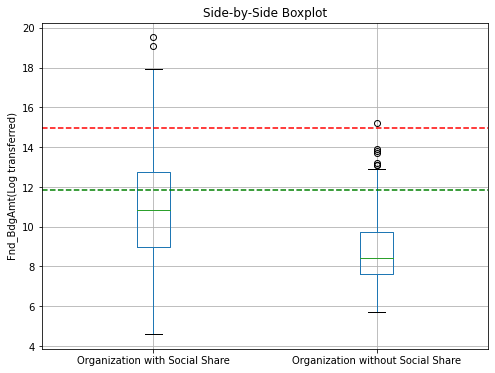

In [112]:

fig, ax = plt.subplots(figsize=(8,6))
filtered_social_df_new = filtered_social_df.dropna()\
    [pd.to_numeric(filtered_social_df['Fnd_BdgAmt'], errors='coerce').notnull()]\
    .astype(int)

filtered_social_df_new[filtered_social_df_new['Fnd_BdgAmt'] > 0]\
    .applymap(np.log)\
    .boxplot(column=['Fnd_BdgAmt'], positions=[1], ax=ax)

filtered_nonsocial_df_new = filtered_nonsocial_df.dropna()\
    [pd.to_numeric(filtered_nonsocial_df['Fnd_BdgAmt'], errors='coerce').notnull()]\
    .astype(int)

filtered_nonsocial_df_new[filtered_nonsocial_df_new['Fnd_BdgAmt'] > 0]\
    .applymap(np.log)\
    .boxplot(column=['Fnd_BdgAmt'], positions=[2], ax=ax)
ax.set_xticklabels(['Organization with Social Share', 'Organization without Social Share'])


# base "e" = mathematical constant approximately equal to 2.71828

# Add mean lines

left_mean= filtered_social_df_new[filtered_social_df_new['Fnd_BdgAmt'] > 0]['Fnd_BdgAmt'].mean()
right_mean = filtered_nonsocial_df_new[filtered_nonsocial_df_new['Fnd_BdgAmt'] > 0]['Fnd_BdgAmt'].mean()

ax.axhline(y=np.log(left_mean), color='r', linestyle='--', label='Mean A')
ax.axhline(y=np.log(right_mean), color='g', linestyle='--', label='Mean B')

# Set the title and labels
plt.title('Side-by-Side Boxplot')
plt.ylabel('Fnd_BdgAmt(Log transferred)')

In [113]:
left_median = filtered_social_df_new[filtered_social_df_new['Fnd_BdgAmt'] > 0]['Fnd_BdgAmt'].median()
right_median = filtered_nonsocial_df_new[filtered_nonsocial_df_new['Fnd_BdgAmt'] > 0]['Fnd_BdgAmt'].median()
left_median, right_median



(50000.0, 4500.0)

Run the t-test to ...  

If the p-value is less than the significance level (usually set at 0.05 or 0.01), it suggests that the difference between the means is statistically significant. In other words, it provides evidence to reject the null hypothesis and accept the alternative hypothesis, indicating that there is a meaningful difference between the two groups.

In [114]:
# Generate two sets of random data
group1 = filtered_social_df_new['Fnd_BdgAmt']
group2 = filtered_nonsocial_df_new['Fnd_BdgAmt']

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Print the results
print("t-statistic = ", t_statistic)
print("p-value = ", p_value)

t-statistic =  1.1856710675632047
p-value =  0.2365299140858455


In [115]:
group1 = combined_df['Fnd_BdgAmt'].apply(lambda x: str(x).isdigit())
group2 = combined_df['NetworkCount']
# combined_df[['Fnd_BdgAmt', 'NetworkCount']].dtypes

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Print the results
print("t-statistic = ", t_statistic)
print("p-value = ", p_value)

t-statistic =  -5.0553024872442975
p-value =  5.051939837062778e-07


Compare different medium of sharing to public impacts on Organization's volunteers, networks and fund budget  
\1. Web plays the most important role in funding budget  

New test methods for below:

50000.0
30000.0
75000.0
53000.0


/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/1805698187.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_medium.set_xticklabels(['Shr_Social', 'Shr_WrdMth', 'Shr_Web', 'Shr_MailBs'])


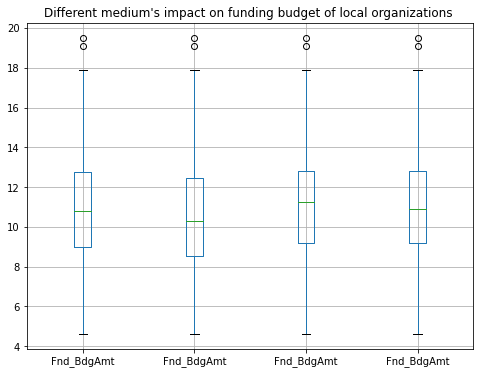

In [116]:

fig_medium, ax_medium = plt.subplots(figsize=(8,6))

def show_media_impact(ax, pos, media_type, on_what):
    selected_cols = [media_type, on_what]
    significant_difference_df = combined_df[selected_cols]

    # next, need to filter social = 1, social = 0, then compare - March.09 1:30AM

    medium_impact_df = significant_difference_df[significant_difference_df[media_type] == 1.0] 
    medium_impact_df = medium_impact_df.dropna()
    medium_impact_df = medium_impact_df[pd.to_numeric(medium_impact_df[on_what], errors='coerce').notnull()]\
        .astype(int)

    medium_impact_df[medium_impact_df[on_what] > 0]\
        .applymap(np.log)\
        .boxplot(column=[on_what], positions=[pos], ax=ax)

    # # base "e" = mathematical constant approximately equal to 2.71828

    # # Add mean lines

    # mean= medium_impact_df[medium_impact_df[on_what] > 0][on_what].mean()
    # ax.set_xticklabels([on_what])

    # ax.axhline(y=np.log(mean), color='r', linestyle='--', label='Mean A')

    # # Set the title and labels
    plt.title("Different medium's impact on funding budget of local organizations ")
    # plt.ylabel(f'{on_what}(Log transferred)')
    median = medium_impact_df[medium_impact_df[on_what] > 0][on_what].median()
    print(median)  

    # Generate two sets of random data
    # group1 = medium_impact_df[media_type]
    # group2 = medium_impact_df[on_what]

    # # Perform an independent samples t-test
    # t_statistic, p_value = ttest_ind(group1, group2)

    # # Print the results
    # print("t-statistic = ", t_statistic)
    # print("p-value = ", p_value)

ax_medium.set_xticklabels(['Shr_Social', 'Shr_WrdMth', 'Shr_Web', 'Shr_MailBs'])
show_media_impact(ax_medium, 1, "Shr_Social", "Fnd_BdgAmt")
show_media_impact(ax_medium, 2, "Shr_WrdMth", "Fnd_BdgAmt")
show_media_impact(ax_medium, 3, "Shr_Web", "Fnd_BdgAmt")
show_media_impact(ax_medium, 4, "Shr_MailBs", "Fnd_BdgAmt")



#I'm not able to change the name to each plot, for example, the first plot's name is Shr_Social, the second one
#is Shr_WrdMth,etc. Thank you!


\2. Word of mouth plays less important role in volunteers number

In [117]:

def media_impact_t_test(media_type1, media_type2, on_what):
    selected_cols = [media_type1, media_type2, on_what]
    significant_difference_df = combined_df[selected_cols]

    # next, need to filter social = 1, social = 0, then compare - March.09 1:30AM

    group1 = significant_difference_df[significant_difference_df[media_type1] == 1.0]
    group1 = group1.dropna()
    group1 = group1[pd.to_numeric(group1[on_what], errors='coerce').notnull()]\
        .astype(int)


    group2 = significant_difference_df[significant_difference_df[media_type2] == 1.0] 
    group2 = group2.dropna()
    group2 = group2[pd.to_numeric(group2[on_what], errors='coerce').notnull()]\
        .astype(int)

    # Perform an independent samples t-test
    t_statistic, p_value = ttest_ind(group1[on_what], group2[on_what])

    # Print the results
    print("t-statistic = ", t_statistic)
    print("p-value = ", p_value)

media_impact_t_test("Shr_Social", "Shr_Web", "Fnd_BdgAmt")
media_impact_t_test("Shr_Web", "Shr_WrdMth", "Fnd_BdgAmt")

t-statistic =  -0.10486304025414281
p-value =  0.9165250777267799
t-statistic =  0.1377770809168158
p-value =  0.8904705533313294


In [118]:

def media_impact_t_test2(media_type1, on_what):
    selected_cols = [media_type1, on_what]
    significant_difference_df = combined_df[selected_cols]

    # next, need to filter social = 1, social = 0, then compare - March.09 1:30AM

    group1 = significant_difference_df[significant_difference_df[media_type1] == 1.0]
    group1 = group1.dropna()
    group1 = group1[pd.to_numeric(group1[on_what], errors='coerce').notnull()]\
        .astype(int)


    group2 = significant_difference_df[significant_difference_df[media_type1] != 1.0] 
    group2 = group2.dropna()
    group2 = group2[pd.to_numeric(group2[on_what], errors='coerce').notnull()]\
        .astype(int)

    # Perform an independent samples t-test
    t_statistic, p_value = ttest_ind(group1[on_what], group2[on_what])

    # Print the results
    print("t-statistic = ", t_statistic)
    print("p-value = ", p_value)

media_impact_t_test2("Shr_Social", "Volunteers")
media_impact_t_test2("Shr_WrdMth", "Volunteers")
media_impact_t_test2("Shr_Web", "Volunteers")
media_impact_t_test2("Shr_MailBs", "Volunteers")


media_impact_t_test2("Shr_Social", "Fnd_BdgAmt")
media_impact_t_test2("Shr_WrdMth", "Fnd_BdgAmt")
media_impact_t_test2("Shr_Web", "Fnd_BdgAmt")
media_impact_t_test2("Shr_MailBs", "Fnd_BdgAmt")

media_impact_t_test2("Shr_Social", "NetworkCount")
media_impact_t_test2("Shr_WrdMth", "NetworkCount")
media_impact_t_test2("Shr_Web", "NetworkCount")
media_impact_t_test2("Shr_MailBs", "NetworkCount")

t-statistic =  1.3776597463859672
p-value =  0.16888544510251013
t-statistic =  1.500604302464923
p-value =  0.13404894638563525
t-statistic =  1.6552069662590634
p-value =  0.09847006543838631
t-statistic =  1.3931088607849453
p-value =  0.16416651041012917
t-statistic =  1.1856710675632047
p-value =  0.2365299140858455
t-statistic =  1.042615796732185
p-value =  0.2978220480885574
t-statistic =  1.3602161313250676
p-value =  0.17460796236653767
t-statistic =  1.3553747897852197
p-value =  0.176143231774273
t-statistic =  1.7796624918264794
p-value =  0.07569983212844586
t-statistic =  0.7024804486199187
p-value =  0.4826856879365736
t-statistic =  1.876972736773279
p-value =  0.06106681752170951
t-statistic =  1.9117237976318118
p-value =  0.05644653658069331


15.0
10.0
15.0
15.0


/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/3831625029.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_medium.set_xticklabels(['Shr_Social', 'Shr_WrdMth', 'Shr_Web', 'Shr_MailBs'])


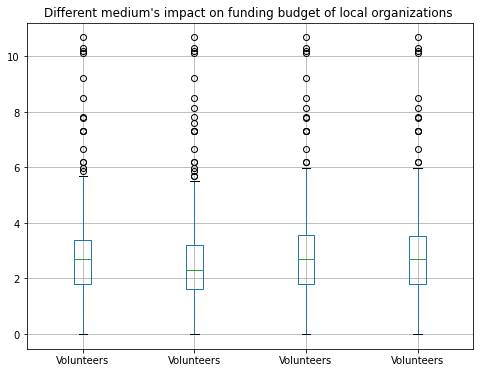

In [119]:
fig_medium, ax_medium = plt.subplots(figsize=(8,6))

ax_medium.set_xticklabels(['Shr_Social', 'Shr_WrdMth', 'Shr_Web', 'Shr_MailBs'])
show_media_impact(ax_medium, 1, "Shr_Social", "Volunteers")
show_media_impact(ax_medium, 2, "Shr_WrdMth", "Volunteers")
show_media_impact(ax_medium, 3, "Shr_Web", "Volunteers")
show_media_impact(ax_medium, 4, "Shr_MailBs", "Volunteers")


/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/3606959687.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_medium.set_xticklabels(['Shr_Social', 'Shr_WrdMth', 'Shr_Web', 'Shr_MailBs'])


4.0
4.0
4.0
4.0


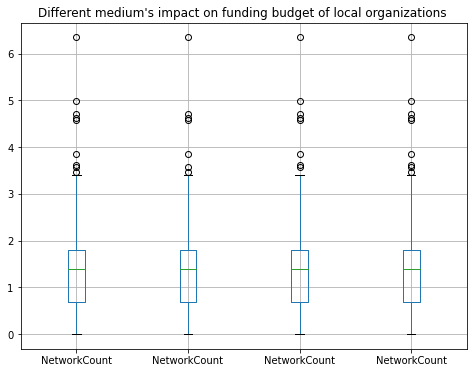

In [120]:
fig_medium, ax_medium = plt.subplots(figsize=(8,6))

ax_medium.set_xticklabels(['Shr_Social', 'Shr_WrdMth', 'Shr_Web', 'Shr_MailBs'])
show_media_impact(ax_medium, 1, "Shr_Social", "NetworkCount")
show_media_impact(ax_medium, 2, "Shr_WrdMth", "NetworkCount")
show_media_impact(ax_medium, 3, "Shr_Web", "NetworkCount")
show_media_impact(ax_medium, 4, "Shr_MailBs", "NetworkCount")

In [121]:
# selected_cols = ['Shr_Social','Volunteers','NetworkCount','Fnd_BdgAmt']
# significant_difference_df = combined_df[selected_cols]


# significant_difference_df.head(50)

# # next, need to filter social = 1, social = 0, then compare - March.09 1:30AM

# filtered_social_df = significant_difference_df[significant_difference_df['Shr_Social'] == 1.0] 
# filtered_social_df.head(20)

# filtered_nonsocial_df = significant_difference_df[significant_difference_df['Shr_Social'] == 0.0] 
# filtered_nonsocial_df.head(10)

/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/3921720943.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_social_df_new = filtered_social_df.dropna()\
/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)
/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/3921720943.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_nonsocial_df_new = filtered_nonsocial_df.dropna()\
/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


Text(0, 0.5, 'Fnd_BdgAmt(Log transferred)')

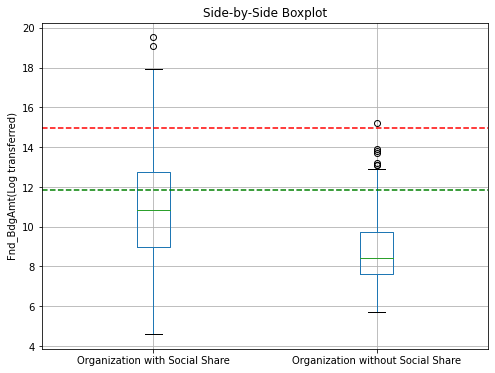

In [122]:

fig, ax = plt.subplots(figsize=(8,6))
filtered_social_df_new = filtered_social_df.dropna()\
    [pd.to_numeric(filtered_social_df['Fnd_BdgAmt'], errors='coerce').notnull()]\
    .astype(int)

filtered_social_df_new[filtered_social_df_new['Fnd_BdgAmt'] > 0]\
    .applymap(np.log)\
    .boxplot(column=['Fnd_BdgAmt'], positions=[1], ax=ax)

filtered_nonsocial_df_new = filtered_nonsocial_df.dropna()\
    [pd.to_numeric(filtered_nonsocial_df['Fnd_BdgAmt'], errors='coerce').notnull()]\
    .astype(int)

filtered_nonsocial_df_new[filtered_nonsocial_df_new['Fnd_BdgAmt'] > 0]\
    .applymap(np.log)\
    .boxplot(column=['Fnd_BdgAmt'], positions=[2], ax=ax)
ax.set_xticklabels(['Organization with Social Share', 'Organization without Social Share'])


# base "e" = mathematical constant approximately equal to 2.71828

# Add mean lines

left_mean= filtered_social_df_new[filtered_social_df_new['Fnd_BdgAmt'] > 0]['Fnd_BdgAmt'].mean()
right_mean = filtered_nonsocial_df_new[filtered_nonsocial_df_new['Fnd_BdgAmt'] > 0]['Fnd_BdgAmt'].mean()

ax.axhline(y=np.log(left_mean), color='r', linestyle='--', label='Mean A')
ax.axhline(y=np.log(right_mean), color='g', linestyle='--', label='Mean B')

# Set the title and labels
plt.title('Side-by-Side Boxplot')
plt.ylabel('Fnd_BdgAmt(Log transferred)')

Map out organizations using zipcode  

In [123]:
selected_cols = ['OrgZip','OrgName','PrimFocus']
zip_df = combined_df[selected_cols]


zip_df = zip_df[pd.notna(zip_df['OrgZip'])]
zip_df['NewOrgZip'] = zip_df['OrgZip'].str.slice(0, 5)
zip_df['NewOrgZip'] = pd.to_numeric(zip_df['NewOrgZip'])
# zip_df.dtypes
# zip_df.head()


def zip_borough(row):
    if row['NewOrgZip'] >= 10001 and row['NewOrgZip'] <= 10282:
        return 'Manhattan'
    elif row['NewOrgZip'] >= 10301 and row['NewOrgZip'] <= 10314:
        return "Staten Island"
    elif row['NewOrgZip'] >= 10451 and row['NewOrgZip'] <= 10475:
        return "Bronx"
    elif row['NewOrgZip'] >= 11004 and row['NewOrgZip'] <= 11109:
        return "Queens"
    elif row['NewOrgZip'] >= 11351 and row['NewOrgZip'] <= 11697:
        return 'Queens'
    elif row['NewOrgZip'] >= 11201 and row['NewOrgZip'] <= 11256:
        return 'Brooklyn'
    else:
        return "N/A"
        

zip_df['Borough'] = zip_df.apply(zip_borough, axis=1)
zip_df.head(40)




,OrgZip,OrgName,PrimFocus,NewOrgZip,Borough
0,11379,Juniper Park Civic Association,Community improvement and capacity building,11379,Queens
1,08901,Lower Raritan Watershed Partnership,Environment,8901,N/A
2,10038,Waterfront Alliance,Environment,10038,Manhattan
3,10468,Baldwin Learning Center (BLC) Coalition,Education,10468,Bronx
4,10022,Green Park Gardeners NY,Environment,10022,Manhattan
5,10002,Green Map NYC,Environment,10002,Manhattan
6,10009-9998,Fifth Street Farm,Education,10009,Manhattan
7,10459,Kelly Street Garden,Food,10459,Bronx
8,10301,Gotham Whale,Animal related,10301,Staten Island
9,11213,Garden Kitchen Lab,Education,11213,Brooklyn


Calcualte numbers of organizations in each borough and the categories of them.

<AxesSubplot:xlabel='PrimFocus'>

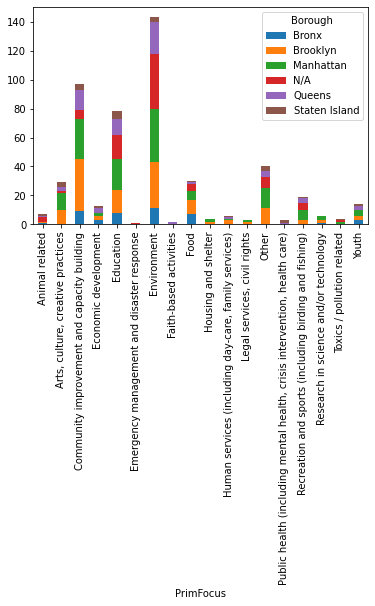

In [124]:
# selected_cols = ['OrgName','OrgCity','water_proj','land_proj','system_proj','other_proj','none_proj']
# categorized_df = projsite_df[selected_cols]
# categorized_df.head(20)



grouped_data = zip_df.dropna().groupby(['PrimFocus','Borough']).size()
grouped_data = grouped_data.unstack(['Borough'])
grouped_data.plot(kind='bar', stacked=True)


# count_data = grouped_data.sum()
# sorted_data = count_data.sort_values('land_proj',ascending=False).reset_index()

# sorted_data.head(8)

# ax = sorted_data.head(8).plot(kind='bar', x='OrgCity', stacked=True)

# # set chart title and axis labels
# ax.set_xlabel('City')
# ax.set_ylabel('Project site Count')

# # show the chart
# plt.show()

In [125]:
filteredNA_df = zip_df[zip_df['Borough'] != 'N/A'] 

grouped_data = filteredNA_df.dropna().groupby(['PrimFocus','Borough']).size()

new_grouped_data = grouped_data.unstack(['PrimFocus'])
new_grouped_data.head(10)

PrimFocus,Animal related,"Arts, culture, creative practices",Community improvement and capacity building,Economic development,Education,Environment,Faith-based activities,Food,Housing and shelter,"Human services (including day-care, family services)","Legal services, civil rights",Other,"Public health (including mental health, crisis intervention, health care)",Recreation and sports (including birding and fishing),Research in science and/or technology,Toxics / pollution related,Youth
Borough,,,,,,,,,,,,,,,,,
Bronx,1.0,NaN,9.0,3.0,8.0,11.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0
Brooklyn,1.0,10.0,36.0,3.0,16.0,32.0,NaN,10.0,2.0,3.0,2.0,11.0,NaN,3.0,2.0,NaN,3.0
Manhattan,NaN,12.0,28.0,2.0,21.0,37.0,NaN,6.0,2.0,1.0,1.0,14.0,NaN,7.0,3.0,2.0,4.0
Queens,1.0,3.0,14.0,3.0,11.0,22.0,2.0,1.0,NaN,1.0,NaN,4.0,1.0,3.0,NaN,NaN,3.0
Staten Island,1.0,3.0,4.0,2.0,5.0,3.0,NaN,1.0,NaN,1.0,NaN,3.0,2.0,1.0,NaN,1.0,1.0


Import and read Environment and health dataset

In [126]:
environment_df = pd.read_csv("Data2Go.NYC Environment Boro.csv")
health_df = pd.read_csv("Data2Go.NYC Health Boro.csv")
environment_df.head()
health_df.head()

,Borough,Binge Drinking,Cancer Deaths(per 100000 residents),Deaths Due to Accidents(per 100000 residents),Drug-related Hospitalizations(per 100000 adults),Infant Mortality,No Exercise in Past 30 Days,No Fruits and Vegetables Yesterday,No Health Insurance,Obese
0,Bronx,14,12.9,130.6,11.61761,5.4,30,17,8.170528,32
1,Brooklyn,15,14.5,130.7,9.89210,3.6,28,14,6.732375,27
2,Manhattan,25,10.3,112.2,8.31025,3.0,19,10,5.219092,15
3,Queens,15,10.8,101.5,9.43570,4.4,30,11,9.075806,22
4,Staten Island,18,11.1,143.0,12.18300,6.7,25,10,4.534330,25


Compare wether there's relationship between organizations with "community improvement" focus of five boroughs and Deaths due to accidents, if yes, what's the ratio like?  
??borough type is object so can't reflect on the chart

In [127]:
# selected_cols = ['Respondent PopID', 'PopID _ALTER']
# selected_network_df = network_df[selected_cols]

# grouped_data = selected_network_df.groupby(['Respondent PopID'])
# count_data = grouped_data.size()
# sorted_data = count_data.sort_values(ascending=False).reset_index()
# sorted_data = sorted_data.rename(columns={'Respondent PopID': 'PopID', 0: 'NetworkCount'})
# sorted_data.head(20)

# sorted_data['PopID'] = sorted_data['PopID'].astype('str')
# df['PopID'] = df['PopID'].astype('str')

combined_borough_df = pd.merge(environment_df, health_df, on='Borough')
combinedAgain_borough_df = pd.merge(new_grouped_data, combined_borough_df, on='Borough')


combinedAgain_borough_df.head(10)



,Borough,Animal related,"Arts, culture, creative practices",Community improvement and capacity building,Economic development,Education,Environment,Faith-based activities,Food,Housing and shelter,...,Water System Complaints,Binge Drinking,Cancer Deaths(per 100000 residents),Deaths Due to Accidents(per 100000 residents),Drug-related Hospitalizations(per 100000 adults),Infant Mortality,No Exercise in Past 30 Days,No Fruits and Vegetables Yesterday,No Health Insurance,Obese
0,Bronx,1.0,NaN,9.0,3.0,8.0,11.0,NaN,7.0,NaN,...,8.347121,14,12.9,130.6,11.61761,5.4,30,17,8.170528,32
1,Brooklyn,1.0,10.0,36.0,3.0,16.0,32.0,NaN,10.0,2.0,...,6.747619,15,14.5,130.7,9.89210,3.6,28,14,6.732375,27
2,Manhattan,NaN,12.0,28.0,2.0,21.0,37.0,NaN,6.0,2.0,...,6.303424,25,10.3,112.2,8.31025,3.0,19,10,5.219092,15
3,Queens,1.0,3.0,14.0,3.0,11.0,22.0,2.0,1.0,NaN,...,7.517444,15,10.8,101.5,9.43570,4.4,30,11,9.075806,22
4,Staten Island,1.0,3.0,4.0,2.0,5.0,3.0,NaN,1.0,NaN,...,11.077808,18,11.1,143.0,12.18300,6.7,25,10,4.534330,25


Tell a story on:  
Pick up STEW-MAP organizations with the focus on community improvement and capacity building, and to see do they have solid impacts on community health level?
It turns out:  
There's a certain correlation between them. 

primfocus is "Community improvement and capacity building"

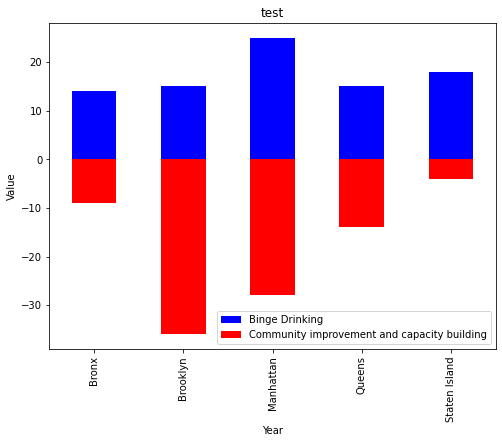

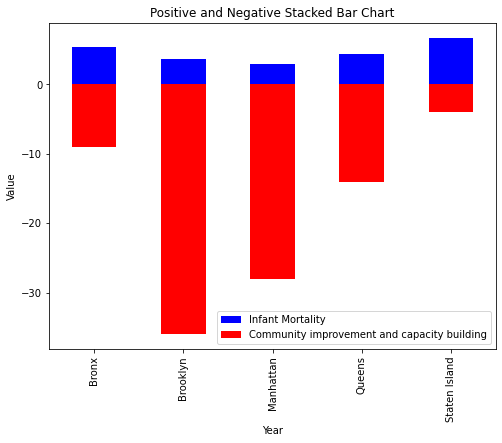

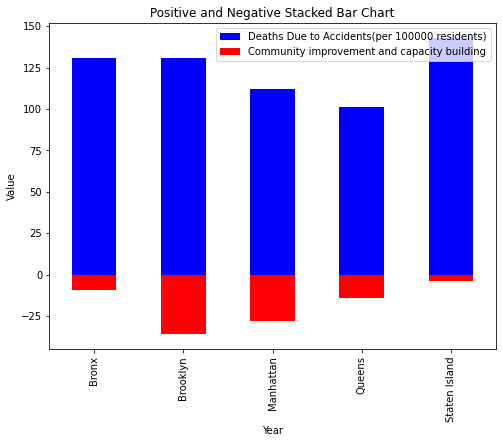

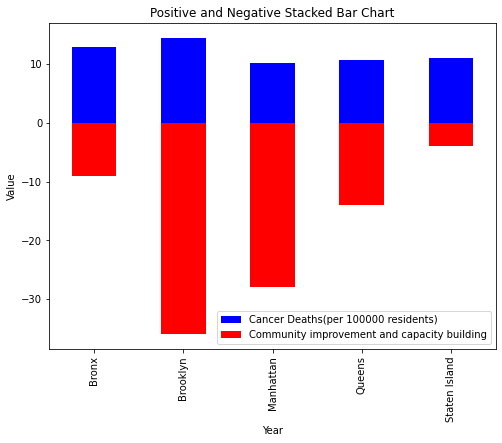

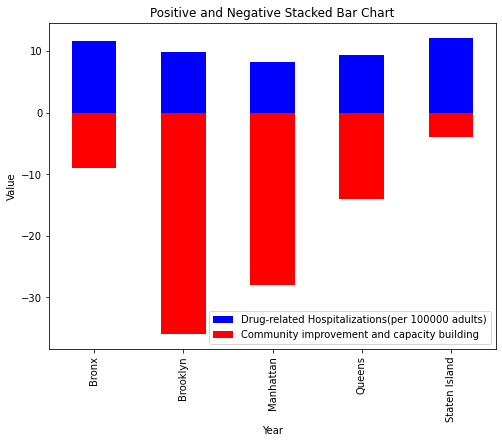

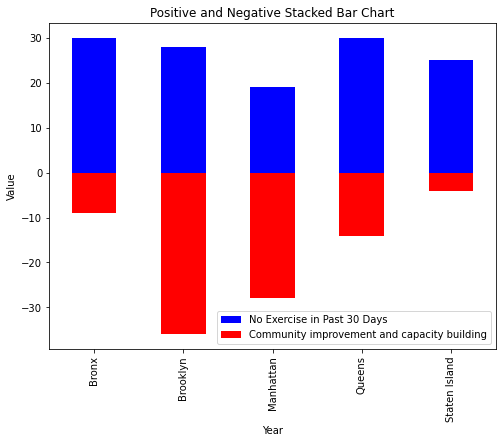

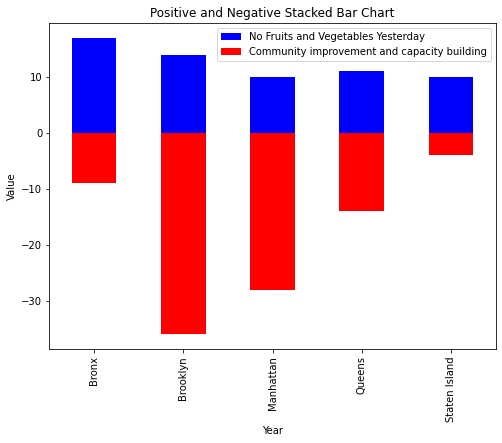

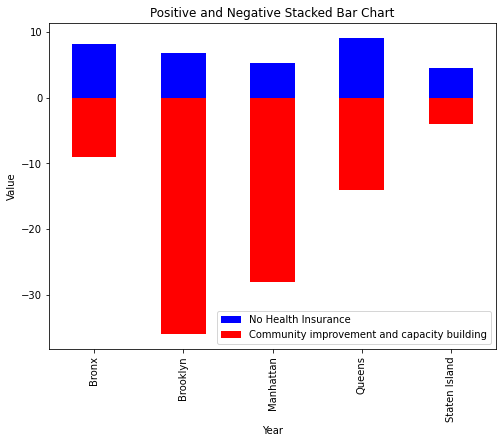

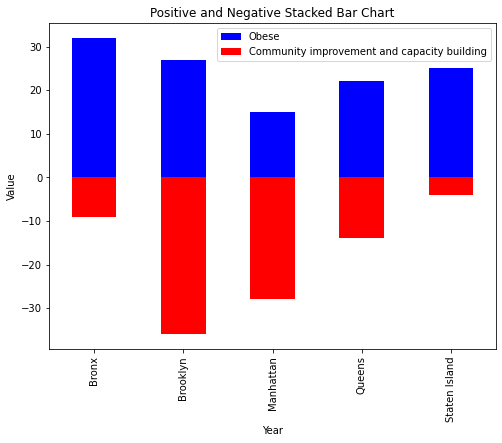

In [153]:
# selected_cols = ['Respondent PopID', 'PopID _ALTER']
# selected_network_df = network_df[selected_cols]

# grouped_data = selected_network_df.groupby(['Respondent PopID'])
# count_data = grouped_data.size()
# sorted_data = count_data.sort_values(ascending=False).reset_index()
# sorted_data = sorted_data.rename(columns={'Respondent PopID': 'PopID', 0: 'NetworkCount'})
# sorted_data.head(20)

# sorted_data['PopID'] = sorted_data['PopID'].astype('str')
# df['PopID'] = df['PopID'].astype('str')

def corelation_community(metric,title ='Positive and Negative Stacked Bar Chart'):
    selected_cols = ['Borough', metric,'Community improvement and capacity building']
    compare1_df = combinedAgain_borough_df[selected_cols]
    compare1_df.head()

    fig, ax = plt.subplots(figsize=(8, 6))
    compare1_df[metric].plot(kind='bar', x=compare1_df['Borough'], color='blue', ax=ax)
    (-compare1_df['Community improvement and capacity building']).plot(kind='bar', x=compare1_df['Borough'], color='red', ax=ax)

    # set axis labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.set_title(title)

    # add legend
    ax.legend([metric, 'Community improvement and capacity building'])

    # change the x-axis labels
    ax.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])
    
    # show plot
    plt.show()

corelation_community("Binge Drinking","test")
corelation_community("Infant Mortality")
corelation_community('Deaths Due to Accidents(per 100000 residents)')
corelation_community('Cancer Deaths(per 100000 residents)')
corelation_community('Drug-related Hospitalizations(per 100000 adults)')
corelation_community('No Exercise in Past 30 Days')
corelation_community('No Fruits and Vegetables Yesterday')
corelation_community('No Health Insurance')
corelation_community('Obese')



Scrape Air Quality data from NYC open data in the location format of borough:

In [129]:
import requests
import urllib.parse
import json

# query = urllib.parse.quote("time_period = 'Annual Average 2017'")
# url = f'https://data.cityofnewyork.us/resource/c3uy-2p5r.json?$where={query}'
query = urllib.parse.quote("Annual Average 2017")
url = f'https://data.cityofnewyork.us/resource/c3uy-2p5r.json?time_period={query}'
air_quality_2017_df = pd.read_json(url)
air_quality_2017_df.head(20)



,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,547612,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,105,Midtown (CD5),Annual Average 2017,2017-01-01T00:00:00.000,10.92
1,547354,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,1,Bronx,Annual Average 2017,2017-01-01T00:00:00.000,7.72
2,547357,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,2,Brooklyn,Annual Average 2017,2017-01-01T00:00:00.000,7.52
3,547360,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,3,Manhattan,Annual Average 2017,2017-01-01T00:00:00.000,8.72
4,547363,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,4,Queens,Annual Average 2017,2017-01-01T00:00:00.000,7.19
5,547366,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,Borough,5,Staten Island,Annual Average 2017,2017-01-01T00:00:00.000,6.81
6,547369,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,UHF42,101,Kingsbridge - Riverdale,Annual Average 2017,2017-01-01T00:00:00.000,7.41
7,547372,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,UHF42,102,Northeast Bronx,Annual Average 2017,2017-01-01T00:00:00.000,7.46
8,547375,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,UHF42,103,Fordham - Bronx Pk,Annual Average 2017,2017-01-01T00:00:00.000,7.52
9,547378,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,UHF42,104,Pelham - Throgs Neck,Annual Average 2017,2017-01-01T00:00:00.000,7.52


Collect air quality in 5 boroughs using city of New York API:


In [ ]:
query = urllib.parse.quote("Annual Average 2017")
url = f'https://data.cityofnewyork.us/resource/c3uy-2p5r.json?time_period={query}'
air_quality_2017_df = pd.read_json(url)
air_quality_2017_df.head(20)

In [145]:
column_air_quality_mean = air_quality_2017_df[['name','geo_place_name','data_value']]
column_air_quality_mean

borough_air_quality = column_air_quality_mean[column_air_quality_mean['geo_place_name'].isin(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])]
borough_air_quality.head()
borough_air_quality_pm25 = borough_air_quality[borough_air_quality['name'] == 'Fine Particulate Matter (PM2.5)']
borough_air_quality_no2 = borough_air_quality[borough_air_quality['name'] == 'Nitrogen Dioxide (NO2)']


In [135]:
combinedAgain_borough_df.head()

,Borough,Animal related,"Arts, culture, creative practices",Community improvement and capacity building,Economic development,Education,Environment,Faith-based activities,Food,Housing and shelter,...,Water System Complaints,Binge Drinking,Cancer Deaths(per 100000 residents),Deaths Due to Accidents(per 100000 residents),Drug-related Hospitalizations(per 100000 adults),Infant Mortality,No Exercise in Past 30 Days,No Fruits and Vegetables Yesterday,No Health Insurance,Obese
0,Bronx,1.0,NaN,9.0,3.0,8.0,11.0,NaN,7.0,NaN,...,8.347121,14,12.9,130.6,11.61761,5.4,30,17,8.170528,32
1,Brooklyn,1.0,10.0,36.0,3.0,16.0,32.0,NaN,10.0,2.0,...,6.747619,15,14.5,130.7,9.89210,3.6,28,14,6.732375,27
2,Manhattan,NaN,12.0,28.0,2.0,21.0,37.0,NaN,6.0,2.0,...,6.303424,25,10.3,112.2,8.31025,3.0,19,10,5.219092,15
3,Queens,1.0,3.0,14.0,3.0,11.0,22.0,2.0,1.0,NaN,...,7.517444,15,10.8,101.5,9.43570,4.4,30,11,9.075806,22
4,Staten Island,1.0,3.0,4.0,2.0,5.0,3.0,NaN,1.0,NaN,...,11.077808,18,11.1,143.0,12.18300,6.7,25,10,4.534330,25


Tell a story on:  
Pick up STEW-MAP organizations with the focus on Environment , and to see do they have solid impacts on the environment performance?

Metrics:
Air Quality 

Back up:
1.carbon emissions reductions
2.gallons of water saved
3.increased waste diversion
4.change in fuel consumption
5.reduction of electricity usage

It turns out:  
There's a certain correlation between them. 

primfocus is "Environment"

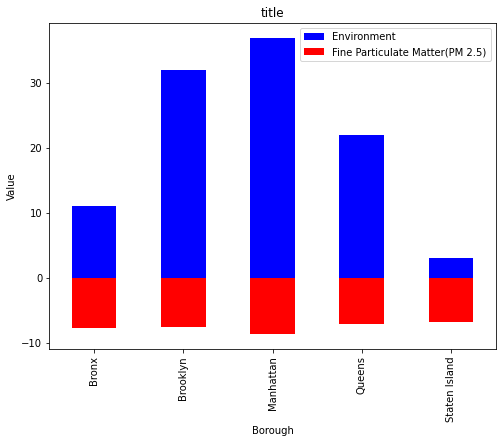

In [151]:
selected_cols = ['Borough','Environment']
compare1_df = combinedAgain_borough_df[selected_cols]
compare1_df.head()

fig, ax = plt.subplots(figsize=(8, 6))
compare1_df['Environment'].plot(kind='bar', x=compare1_df['Borough'], color='blue', ax=ax)
(-borough_air_quality_pm25['data_value']).plot(kind='bar', x=borough_air_quality_pm25['geo_place_name'], color='red', ax=ax)

# set axis labels and title
ax.set_xlabel('Borough')
ax.set_ylabel('Value')
ax.set_title("title")

# add legend
ax.legend(["Environment", 'Fine Particulate Matter(PM 2.5)'])

# change the x-axis labels
ax.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])

# show plot
plt.show()

"No, when it comes to NO2 (nitrogen dioxide), the higher the concentration is not necessarily better. Nitrogen dioxide is a harmful air pollutant that can cause respiratory problems and exacerbate asthma and other lung diseases. Exposure to high levels of NO2 can also increase the risk of cardiovascular disease.

According to the United States Environmental Protection Agency (EPA), the National Ambient Air Quality Standard (NAAQS) for nitrogen dioxide is 53 parts per billion (ppb) as an annual average concentration, and 100 ppb as a 1-hour average concentration. This means that exposure to NO2 concentrations above these levels may cause adverse health effects.

Therefore, it is important to monitor and regulate NO2 concentrations in the air to ensure that they remain at safe levels. In general, lower concentrations of NO2 are better for human health and the environment."

So more environmental focused organizations. 
Bronx needs more organizations. 

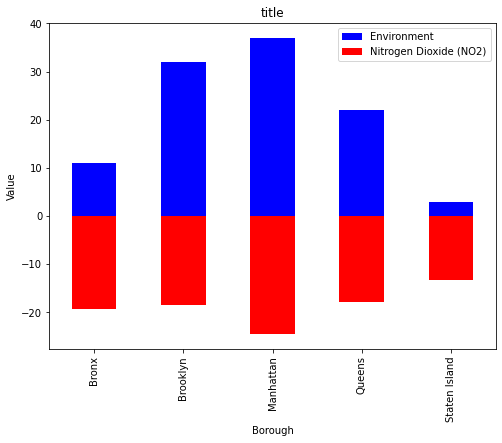

In [152]:
selected_cols = ['Borough','Environment']
compare1_df = combinedAgain_borough_df[selected_cols]
compare1_df.head()

fig, ax = plt.subplots(figsize=(8, 6))
compare1_df['Environment'].plot(kind='bar', x=compare1_df['Borough'], color='blue', ax=ax)
(-borough_air_quality_no2['data_value']).plot(kind='bar', x=borough_air_quality_no2['geo_place_name'], color='red', ax=ax)

# set axis labels and title
ax.set_xlabel('Borough')
ax.set_ylabel('Value')
ax.set_title("title")

# add legend
ax.legend(["Environment", 'Nitrogen Dioxide (NO2)'])

# change the x-axis labels
ax.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])

# show plot
plt.show()

In [ ]:
# year_last_documented>1997 and year_last_documented<2017 and taxonomic_group = 'Butterfiles and Moths'
# query = urllib.parse.quote("time_period = 'Annual Average 2017'") year_last_documented
# url = f'https://data.cityofnewyork.us/resource/c3uy-2p5r.json?$where={query}'
query = urllib.parse.quote("taxonomic_group = 'Butterflies and Moths'")
url = f'https://data.ny.gov/resource/9g7i-6he2.json?$where={query}'
species_nyc_df = pd.read_json(url)
species_nyc_df.head(20)

,county,category,taxonomic_group,taxonomic_subgroup,scientific_name,common_name,year_last_documented,ny_listing_status,federal_listing_status,state_conservation_rank,global_conservation_rank,distribution_status
0,Albany,Animal,Butterflies and Moths,Moths,Acronicta albarufa,Barrens Dagger Moth,1983,not listed,not listed,S1,G3G4,Historically Confirmed
1,Albany,Animal,Butterflies and Moths,Moths,Anisota senatoria,Orange-striped Oakworm Moth,2014,not listed,not listed,SU,G5,Recently Confirmed
2,Albany,Animal,Butterflies and Moths,Moths,Apodrepanulatrix liberaria,A Geometer Moth,2016,not listed,not listed,S1S2,G3,Recently Confirmed
3,Albany,Animal,Butterflies and Moths,Moths,Bagisara rectifascia,Straight Lined Mallow Moth,2014,not listed,not listed,SU,G4,Recently Confirmed
4,Albany,Animal,Butterflies and Moths,Moths,Catocala pretiosa pretiosa,Precious Underwing,not available,not listed,not listed,SH,G4T2,Possible but not Confirmed
5,Albany,Animal,Butterflies and Moths,Moths,Catocala umbrosa,An Underwing Moth,not available,not listed,not listed,SH,G5,Historically Confirmed
6,Albany,Animal,Butterflies and Moths,Moths,Cerma cora,Bird Dropping Moth,2018,not listed,not listed,S1S2,G3G4,Recently Confirmed
7,Albany,Animal,Butterflies and Moths,Moths,Chaetaglaea cerata,Waxed Sallow,2014,not listed,not listed,S1S3,G3G4,Recently Confirmed
8,Albany,Animal,Butterflies and Moths,Moths,Chytonix sensilis,Sensitive Chytonix,2016,not listed,not listed,S1S3,G4,Recently Confirmed
9,Albany,Animal,Butterflies and Moths,Moths,Cleora projecta,Projecta Gray,2015,not listed,not listed,SU,G4,Recently Confirmed


Use decision tree for Research Q1 for meaningful storytelling on budget differences.

In [ ]:
#select influencers columns that affect budgets

new_combined_df = combined_df[pd.notna(combined_df['OrgZip'])]
new_combined_df['NewOrgZip'] = new_combined_df['OrgZip'].str.slice(0, 5)
new_combined_df['NewOrgZip'] = pd.to_numeric(new_combined_df['NewOrgZip'])        

new_combined_df['Borough'] = new_combined_df.apply(zip_borough, axis=1)
new_combined_df.head(40)

influence_budge_df =  new_combined_df[["Borough", "YrFnd_Num", "Shr_Social", "Fnd_BdgAmt"]]
influence_budge_df = influence_budge_df.dropna()
influence_budge_df = influence_budge_df[pd.to_numeric(influence_budge_df['YrFnd_Num'], errors='coerce').notnull()]
influence_budge_df = influence_budge_df[pd.to_numeric(influence_budge_df['Fnd_BdgAmt'], errors='coerce').notnull()]
influence_budge_df.head()


/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/583010267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_combined_df['NewOrgZip'] = new_combined_df['OrgZip'].str.slice(0, 5)
/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/583010267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_combined_df['NewOrgZip'] = pd.to_numeric(new_combined_df['NewOrgZip'])
/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_884/583010267.py:7: SettingWithCopyWarning: 
A value is

,Borough,YrFnd_Num,Shr_Social,Fnd_BdgAmt
0,Queens,1938.0,1.0,75000
1,N/A,2014.0,1.0,32000
3,Bronx,2014.0,1.0,10000
5,Manhattan,1992.0,0.0,1000000
7,Bronx,2014.0,1.0,1000


In [ ]:
# Branching budget into low, medium and high.

# select_budget = influence_budge_df[['Fnd_BdgAmt']]
# select_budget.head(20)
Fnd_BdgAmt = influence_budge_df['Fnd_BdgAmt'].astype(int)

q1 = Fnd_BdgAmt.quantile(0.25)
q3 = Fnd_BdgAmt.quantile(0.75)
print(q1,q3)

iqr = q3 - q1

# Define the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

def cal_budget_level(row):
    if int(row["Fnd_BdgAmt"]) >= upper_bound:
        return 'high'
    elif int(row["Fnd_BdgAmt"]) < lower_bound:
        return 'low'    
    else:
        return 'mid'

influence_budge_df['budget_level'] = influence_budge_df.apply(cal_budget_level, axis=1)
influence_budge_df.head()



2000.0 150000.0


,Borough,YrFnd_Num,Shr_Social,Fnd_BdgAmt,budget_level
0,Queens,1938.0,1.0,75000,mid
1,N/A,2014.0,1.0,32000,mid
3,Bronx,2014.0,1.0,10000,mid
5,Manhattan,1992.0,0.0,1000000,high
7,Bronx,2014.0,1.0,1000,mid


In [ ]:
# 1. Import the necessary libraries:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# 2. Load the data into a pandas dataframe:
influence_budge_df = influence_budge_df.reset_index(drop=True)

# 3.Split the data into features (X) and target (y):
X = influence_budge_df.drop('budget_level', axis=1)
y = influence_budge_df['budget_level']

# 4. Encode the categorical variables using one-hot encoding:
cat_cols = ['Borough', 'YrFnd_Num']
enc = OneHotEncoder(sparse=False)
X_encoded = enc.fit_transform(X[cat_cols])
X_encoded = pd.DataFrame(X_encoded, columns=enc.get_feature_names(cat_cols))
a = X.drop(cat_cols, axis=1)
X = pd.concat([X.drop(cat_cols, axis=1), X_encoded], axis=1)

# 5.Split the data into training and testing sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6.Create a decision tree classifier and fit it to the training data:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 7.Predict the target values for the testing set:
y_pred = clf.predict(X_test)

# 8.Evaluate the performance of the model:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9848484848484849


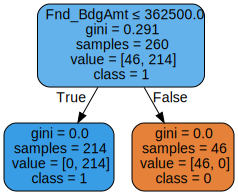

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

from IPython.display import display
display(graph)





In [ ]:
X.columns

Index(['Shr_Social', 'Fnd_BdgAmt', 'Borough_Bronx', 'Borough_Brooklyn',
       'Borough_Manhattan', 'Borough_N/A', 'Borough_Queens',
       'Borough_Staten Island', 'YrFnd_Num_1862.0', 'YrFnd_Num_1872.0',
       'YrFnd_Num_1876.0', 'YrFnd_Num_1889.0', 'YrFnd_Num_1891.0',
       'YrFnd_Num_1908.0', 'YrFnd_Num_1914.0', 'YrFnd_Num_1920.0',
       'YrFnd_Num_1927.0', 'YrFnd_Num_1931.0', 'YrFnd_Num_1934.0',
       'YrFnd_Num_1938.0', 'YrFnd_Num_1945.0', 'YrFnd_Num_1950.0',
       'YrFnd_Num_1956.0', 'YrFnd_Num_1960.0', 'YrFnd_Num_1961.0',
       'YrFnd_Num_1962.0', 'YrFnd_Num_1966.0', 'YrFnd_Num_1967.0',
       'YrFnd_Num_1968.0', 'YrFnd_Num_1969.0', 'YrFnd_Num_1970.0',
       'YrFnd_Num_1971.0', 'YrFnd_Num_1972.0', 'YrFnd_Num_1973.0',
       'YrFnd_Num_1974.0', 'YrFnd_Num_1975.0', 'YrFnd_Num_1976.0',
       'YrFnd_Num_1977.0', 'YrFnd_Num_1978.0', 'YrFnd_Num_1979.0',
       'YrFnd_Num_1980.0', 'YrFnd_Num_1981.0', 'YrFnd_Num_1982.0',
       'YrFnd_Num_1983.0', 'YrFnd_Num_1984.0', 'YrFnd_Num_

In [ ]:
# from ipywidgets import interact
# import matplotlib.pyplot as plt
# %matplotlib notebook
# # %matplotlib widget


# def select_dependent_variable(dependent_variable):
#     # df_filtered= df.loc[df['days'] == int(number_of_days)] 
#     # ax = df_filtered[["category", "value"]].boxplot( by="category", return_type='axes')
#     # ax["value"].set_title("Day " + number_of_days)
#     # print(df_filtered)
#     fig, ax = plt.subplots(figsize=(8,6))
#     filtered_social_df[filtered_social_df[dependent_variable] > 0]\
#         .applymap(np.log)\
#         .boxplot(column=[dependent_variable], positions=[1], ax=ax)
#     filtered_nonsocial_df[filtered_nonsocial_df[dependent_variable] > 0]\
#         .applymap(np.log)\
#         .boxplot(column=[dependent_variable], positions=[2], ax=ax)
#     ax.set_xticklabels(['Organization with Social Share', 'Organization without Social Share'])


#     # base "e" = mathematical constant approximately equal to 2.71828

#     # Add mean lines

#     left_mean= filtered_social_df[filtered_social_df[dependent_variable] > 0][dependent_variable].mean()
#     right_mean = filtered_nonsocial_df[filtered_nonsocial_df[dependent_variable] > 0][dependent_variable].mean()

#     ax.axhline(y=np.log(left_mean), color='r', linestyle='--', label='Mean A')
#     ax.axhline(y=np.log(right_mean), color='g', linestyle='--', label='Mean B')

#     # Set the title and labels
#     plt.title('Side-by-Side Boxplot')
#     plt.ylabel('Volunteers(Log transferred)')

    
# variables = ['Volunteers','NetworkCount','Fnd_BdgAmt']

# interact(select_dependent_variable, dependent_variable=variables)